In [2]:
from src.data import extract_vault
import matplotlib.pyplot as plt 
import networkx as nx
import numpy as np

In [5]:
vault = extract_vault('./vaultes/Digital-Garden/')

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries,  to Pasted image 20211015135734.png
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rel_filepath      81 non-null     object        
 1   abs_filepath      81 non-null     object        
 2   file_exists       102 non-null    object        
 3   n_backlinks       102 non-null    object        
 4   n_wikilinks       15 non-null     float64       
 5   n_tags            15 non-null     float64       
 6   n_embedded_files  15 non-null     float64       
 7   modified_time     81 non-null     datetime64[ns]
 8   graph_category    102 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 8.0+ KB
None


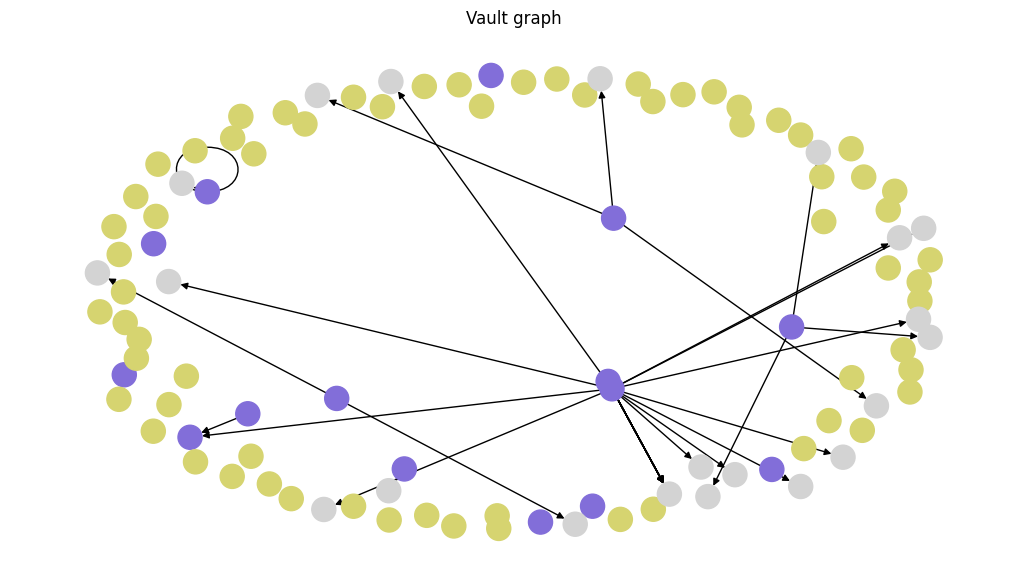

In [6]:
df = vault.get_all_file_metadata()

colour_map = {'note': '#826ED9',
              'nonexistent': '#D3D3D3',
              'attachment': '#D6D470'}
node_colours_lookup = (df['graph_category']
                       .map(colour_map)
                       .to_dict())
node_colours_list = [node_colours_lookup.get(i)
                     for i in vault.graph.nodes()]

fig, ax = plt.subplots(figsize=(13,7))
nx.draw(vault.graph, node_color=node_colours_list, with_labels=False, ax=ax)
ax.set_title('Vault graph')
plt.show()

### Graph

In [7]:
type(vault.graph)

networkx.classes.multidigraph.MultiDiGraph

In [ ]:
A = nx.adjacency_matrix(vault.graph)
plt.imshow(A.todense())
plt.show()

In [ ]:
list(vault.graph.edges)

In [ ]:
df.loc['Obsidian special formatting']

In [ ]:
type(vault)

In [ ]:
list(vault.graph.nodes)

In [ ]:
df['rel_filepath']['learn shortcuts fast']

In [8]:
df

,rel_filepath,abs_filepath,file_exists,n_backlinks,n_wikilinks,n_tags,n_embedded_files,modified_time,graph_category
file,,,,,,,,,
,NaN,NaN,False,12,NaN,NaN,NaN,NaT,nonexistent
7-Anwendungen der Differentialrechnung,docs/Maths/Analysis/7-Anwendungen der Differen...,vaultes/Digital-Garden/docs/Maths/Analysis/7-A...,True,0,0.0,0.0,0.0,2023-03-23 16:59:17.950043440,note
4-Funktionen,docs/Maths/Analysis/4-Funktionen.md,vaultes/Digital-Garden/docs/Maths/Analysis/4-F...,True,1,13.0,0.0,10.0,2023-03-23 16:59:17.950043440,note
1-Mengenlehre,docs/Maths/Analysis/1-Mengenlehre.md,vaultes/Digital-Garden/docs/Maths/Analysis/1-M...,True,0,0.0,0.0,1.0,2023-03-23 16:59:17.950043440,note
Mathematik für Daten Kommunikation,docs/Maths/Mathematik für Daten Kommunikation.md,vaultes/Digital-Garden/docs/Maths/Mathematik f...,True,0,0.0,0.0,0.0,2023-03-23 16:59:18.390045643,note
...,...,...,...,...,...,...,...,...,...
Pasted image 20211024151948.png,NaN,NaN,False,1,NaN,NaN,NaN,NaT,nonexistent
Pasted image 20211024101445.png,NaN,NaN,False,1,NaN,NaN,NaN,NaT,nonexistent
Pasted image 20211024102226.png,NaN,NaN,False,1,NaN,NaN,NaN,NaT,nonexistent
